In [1]:
import pandas as pd
import glob
import os

# Verify your CSV directory path
csv_folder = r'C:\Users\GaganReddy\projects\climatewise\Projects\Actual\Analysis\projectID Based\etim_data'  # <-- Replace this with actual path

# Check if CSV files are found
csv_files = glob.glob(os.path.join(csv_folder, '*.csv'))

print("Found CSV files:")
print(csv_files)

# List to store DataFrames
dfs = []

# Check each file individually
for csv_file in csv_files:
    try:
        df = pd.read_csv(csv_file, encoding='utf-8', low_memory=False)
        df['Source'] = os.path.basename(csv_file).replace('.csv', '')
        dfs.append(df)
        print(f"Successfully read: {csv_file}, shape: {df.shape}")
    except Exception as e:
        print(f"Error reading file {csv_file}: {e}")

# Combine only if dfs has elements
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    print(combined_df.head())
else:
    print("No dataframes to concatenate. Please check the CSV files.")


Found CSV files:
['C:\\Users\\GaganReddy\\projects\\climatewise\\Projects\\Actual\\Analysis\\projectID Based\\etim_data\\batterymanufacturing_temp.csv', 'C:\\Users\\GaganReddy\\projects\\climatewise\\Projects\\Actual\\Analysis\\projectID Based\\etim_data\\biogas_temp.csv', 'C:\\Users\\GaganReddy\\projects\\climatewise\\Projects\\Actual\\Analysis\\projectID Based\\etim_data\\combined_cleaned_dataset.csv', 'C:\\Users\\GaganReddy\\projects\\climatewise\\Projects\\Actual\\Analysis\\projectID Based\\etim_data\\combined_dataset.csv', 'C:\\Users\\GaganReddy\\projects\\climatewise\\Projects\\Actual\\Analysis\\projectID Based\\etim_data\\distributedrpgeneration_temp.csv', 'C:\\Users\\GaganReddy\\projects\\climatewise\\Projects\\Actual\\Analysis\\projectID Based\\etim_data\\energystorage_temp.csv', 'C:\\Users\\GaganReddy\\projects\\climatewise\\Projects\\Actual\\Analysis\\projectID Based\\etim_data\\ethanolproduction_temp.csv', 'C:\\Users\\GaganReddy\\projects\\climatewise\\Projects\\Actual\\Ana

In [2]:
import pandas as pd
import numpy as np

# Dictionary to store DataFrames
dfs = {
    'battery': pd.read_csv('etim_data/batterymanufacturing_temp.csv'),
    'biogas': pd.read_csv('etim_data/biogas_temp.csv'),
    'distributed': pd.read_csv('etim_data/distributedrpgeneration_temp.csv'),
    'storage': pd.read_csv('etim_data/energystorage_temp.csv'),
    'ethanol': pd.read_csv('etim_data/ethanolproduction_temp.csv'),
    'grid': pd.read_csv('etim_data/gridscaleregeneration_temp.csv'),
    'hydrogen': pd.read_csv('etim_data/greenhydrogen_temp.csv'),
    'solar': pd.read_csv('etim_data/solar_temp.csv')
}

# Print shape and columns for each DataFrame
print("Dataset Shapes and Columns:")
print("-" * 50)
for name, df in dfs.items():
    print(f"\n{name.upper()}:")
    print(f"Shape: {df.shape}")
    print("Columns:", df.columns.tolist())

# Find common columns
all_columns = set()
common_columns = set(dfs['battery'].columns)

for df in dfs.values():
    all_columns.update(df.columns)
    common_columns.intersection_update(df.columns)

print("\nCOMMON COLUMNS ACROSS ALL DATASETS:")
print("-" * 50)
for col in common_columns:
    print(col)

print("\nALL UNIQUE COLUMNS:")
print("-" * 50)
for col in sorted(all_columns):
    print(col)

# Create a presence matrix
presence_matrix = pd.DataFrame(index=sorted(all_columns), columns=dfs.keys())
for col in sorted(all_columns):
    for name, df in dfs.items():
        presence_matrix.loc[col, name] = col in df.columns

print("\nCOLUMN PRESENCE MATRIX:")
print("-" * 50)
print(presence_matrix)

Dataset Shapes and Columns:
--------------------------------------------------

BATTERY:
Shape: (27, 16)
Columns: ['Developersorted ascendingDeveloper Category', 'Unnamed: 1', 'Developersorted ascending', 'Developer Category', 'Project Name', 'Value Chain', 'State', 'Capacity of cells (MW)', 'Capacity (Battery/Year)', 'Capacity (Tonnes/Year)', 'Investment (USD Million)', 'PLI status', 'Project Status', 'Planned COD', 'Verfified by developer', 'Contact Developer']

BIOGAS:
Shape: (749, 13)
Columns: ['Developersorted ascendingDeveloper Category', 'Unnamed: 1', 'Developersorted ascending', 'Developer Category', 'Project Name', 'Feedstock Type', 'State', 'Capacity (TPD)', 'Investment (USD Million)', 'Project Status', 'Planned COD', 'Verfified by developer', 'Contact Developer']

DISTRIBUTED:
Shape: (198, 16)
Columns: ['Developersorted ascendingDeveloper Category', 'Unnamed: 1', 'Developersorted ascending', 'Developer Category', 'Project Name', 'Technology', 'State', 'Capacity (MW)', 'Inves

In [3]:

# Create combined DataFrame
combined_df = pd.DataFrame()

for name, df in dfs.items():
    # Select only common columns
    temp_df = df[list(common_columns)].copy()
    # Add source column
    temp_df['source'] = name
    # Append to combined DataFrame
    combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Basic info about the combined dataset
print("\nCOMBINED DATASET INFO:")
print("-" * 50)
print(f"Shape: {combined_df.shape}")
print("\nColumns:", list(combined_df.columns))
print("\nSample counts by source:")
print(combined_df['source'].value_counts())

# Check for missing values
print("\nMissing values count:")
print(combined_df.isnull().sum())

# Save combined DataFrame
combined_df.to_csv('etim_data/combined_dataset.csv', index=False) 


COMBINED DATASET INFO:
--------------------------------------------------
Shape: (1622, 12)

Columns: ['Contact Developer', 'Verfified by developer', 'Investment (USD Million)', 'Developersorted ascending', 'Developersorted ascendingDeveloper Category', 'Planned COD', 'Unnamed: 1', 'Developer Category', 'Project Status', 'State', 'Project Name', 'source']

Sample counts by source:
source
biogas         749
grid           280
ethanol        217
distributed    198
storage         69
hydrogen        48
solar           34
battery         27
Name: count, dtype: int64

Missing values count:
Contact Developer                                 0
Verfified by developer                            6
Investment (USD Million)                          0
Developersorted ascending                       114
Developersorted ascendingDeveloper Category       0
Planned COD                                     489
Unnamed: 1                                     1622
Developer Category                         

In [4]:
combined_df.shape

(1622, 12)

In [5]:
# Check initial shape before dropping duplicates
print("Initial DataFrame shape:", combined_df.shape)

# Identify duplicates
duplicates = combined_df[combined_df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Remove duplicates
combined_df_clean = combined_df.drop_duplicates().reset_index(drop=True)

# Final shape after duplicates removal
print("Cleaned DataFrame shape:", combined_df_clean.shape)


Initial DataFrame shape: (1622, 12)
Number of duplicate rows: 65
Cleaned DataFrame shape: (1557, 12)


In [6]:
combined_df_clean.shape

(1557, 12)

In [7]:
combined_df_clean.to_csv('etim_data/combined_cleaned_dataset.csv', index=False) 

In [8]:
combined_df_clean.head()

,Contact Developer,Verfified by developer,Investment (USD Million),Developersorted ascending,Developersorted ascendingDeveloper Category,Planned COD,Unnamed: 1,Developer Category,Project Status,State,Project Name,source
0,Contact,--,1172.84,Amara Raja Batteries Limited,Amara Raja Batteries LimitedPrivate,--,NaN,Private,Announced,Telangana,Amara raja batteries cell component manufactur...,battery
1,Contact,--,864.2,Amperex Technology Limited,Amperex Technology LimitedPrivate,--,NaN,Private,Under Construction,Haryana,Amperex technology's battery manufacturing pro...,battery
2,Contact,--,74.07,Attero Recycling Private Limited,Attero Recycling Private LimitedPrivate,--,NaN,Private,Announced,Telangana,Attero's project for lithium-ion battery recyc...,battery
3,Contact,--,495.68,C4V Limited,C4V LimitedPrivate,--,NaN,Private,Announced,Karnataka,"C4V's 5,000 GWh Lithium-ion cell manufacturing...",battery
4,Contact,--,--,Central Electro Chemical Research Institute (C...,Central Electro Chemical Research Institute (C...,--,NaN,Private,Announced,Tamil Nadu,CECRI's lithium-ion battery manufacturing plant,battery


In [9]:
combined_df_clean['Project Status'].unique()

array(['Announced', 'Under Construction', 'Permitting', 'Under Bidding'],
      dtype=object)

In [10]:
combined_df_clean['source'].unique()

array(['battery', 'biogas', 'distributed', 'storage', 'ethanol', 'grid',
       'hydrogen', 'solar'], dtype=object)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\GaganReddy\projects\climatewise\Projects\Actual\Analysis\projectID Based\etim_data\combined_cleaned_dataset.csv')

# Quick overview of the data
print(f"Total projects: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

# Clean and convert investment values
df['Investment (USD Million)'] = pd.to_numeric(df['Investment (USD Million)'], errors='coerce')

# Filter for large projects (>$500 million) in early stages
early_stages = ['Announced', 'Permitting', 'Under Bidding']
focus_sectors = ['grid', 'solar', 'ethanol', 'biogas', 'hydrogen']

large_early_projects = df[
    (df['Investment (USD Million)'] > 500) & 
    (df['Project Status'].isin(early_stages)) &
    (df['source'].isin(focus_sectors))
].copy()

print(f"\nLarge early-stage projects in focus sectors: {len(large_early_projects)}")

# Distribution by sector
sector_counts = large_early_projects['source'].value_counts()
print("\nSector distribution of large early-stage projects:")
print(sector_counts)

# Distribution by state
state_counts = large_early_projects['State'].value_counts().head(10)
print("\nTop 10 states with large early-stage projects:")
print(state_counts)

# Distribution by project status
status_counts = large_early_projects['Project Status'].value_counts()
print("\nProject status distribution:")
print(status_counts)

# Distribution by investment size
investment_bins = [500, 1000, 2000, 5000, float('inf')]
investment_labels = ['$500M-$1B', '$1B-$2B', '$2B-$5B', '>$5B']
large_early_projects['Investment Range'] = pd.cut(
    large_early_projects['Investment (USD Million)'], 
    bins=investment_bins, 
    labels=investment_labels
)
investment_dist = large_early_projects['Investment Range'].value_counts().sort_index()
print("\nInvestment size distribution:")
print(investment_dist)

# Top developers with multiple large projects
top_developers = large_early_projects['Developersorted ascending'].value_counts().head(10)
print("\nTop 10 developers with multiple large projects:")
print(top_developers)

Total projects: 1557
Columns: ['Contact Developer', 'Verfified by developer', 'Investment (USD Million)', 'Developersorted ascending', 'Developersorted ascendingDeveloper Category', 'Planned COD', 'Unnamed: 1', 'Developer Category', 'Project Status', 'State', 'Project Name', 'source']

Large early-stage projects in focus sectors: 25

Sector distribution of large early-stage projects:
source
hydrogen    17
solar        5
biogas       2
grid         1
Name: count, dtype: int64

Top 10 states with large early-stage projects:
State
Karnataka         4
Odisha            3
--                3
Rajasthan         2
Tamil Nadu        2
Gujarat           2
Maharashtra       1
Haryana           1
Andhra Pradesh    1
Kerala            1
Name: count, dtype: int64

Project status distribution:
Project Status
Announced     13
Permitting    12
Name: count, dtype: int64

Investment size distribution:
Investment Range
$500M-$1B    11
$1B-$2B       1
$2B-$5B       7
>$5B          6
Name: count, dtype: int

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set styling for better visualizations
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Load the dataset
df = pd.read_csv(r'C:\Users\GaganReddy\projects\climatewise\Projects\Actual\Analysis\projectID Based\etim_data\combined_cleaned_dataset.csv')

# Clean and convert investment values
df['Investment (USD Million)'] = pd.to_numeric(df['Investment (USD Million)'], errors='coerce')

# Define focus categories
early_stages = ['Announced', 'Permitting', 'Under Bidding']
focus_sectors = ['grid', 'solar', 'ethanol', 'biogas', 'hydrogen']

# Filter for large projects (>$500 million) in early stages and focus sectors
large_early_projects = df[
    (df['Investment (USD Million)'] > 500) & 
    (df['Project Status'].isin(early_stages)) &
    (df['source'].isin(focus_sectors))
].copy()

print(f"Total projects in dataset: {len(df)}")
print(f"Large early-stage projects in focus sectors: {len(large_early_projects)}")

Total projects in dataset: 1557
Large early-stage projects in focus sectors: 25


In [13]:
large_early_projects.head(25)

,Contact Developer,Verfified by developer,Investment (USD Million),Developersorted ascending,Developersorted ascendingDeveloper Category,Planned COD,Unnamed: 1,Developer Category,Project Status,State,Project Name,source
233,Contact,--,2962.96,GDBIOGAS PVT LTD,GDBIOGAS PVT LTDPrivate,--,NaN,Private,Permitting,Maharashtra,GDBIOGAS PVT LTD,biogas
623,Contact,--,9481.48,SHYAAMG RENEWABLE ENERGY PRIVATE LIMITED,SHYAAMG RENEWABLE ENERGY PRIVATE LIMITEDPrivate,--,NaN,Private,Permitting,Haryana,SHYAAMG RENEWABLE ENERGY PRIVATE LIMITED,biogas
1308,Contact,--,668.00,Coal India Limited,Coal India LimitedPSU,2024,NaN,PSU,Permitting,Rajasthan,RVUNL's 1190 MW Bikaner solar park,grid
1476,Contact,--,6172.84,ABC Cleantech Limited,ABC Cleantech LimitedPrivate,NaN,NaN,Private,Permitting,Karnataka,ABC Cleantech's green hydrogen and ammonia pla...,hydrogen
1477,Contact,--,6419.75,ACME Cleantech Solutions Private Limited,ACME Cleantech Solutions Private LimitedPrivate,2027,NaN,Private,Permitting,Karnataka,"ACME's Green Hydrogen and Ammonia project, Kar...",hydrogen
1478,Contact,--,6478.00,ACME Cleantech Solutions Private Limited,ACME Cleantech Solutions Private LimitedPrivate,2027,NaN,Private,Announced,Odisha,ACME Cleantech Solutions Private Limited Green...,hydrogen
1479,Contact,--,6478.27,ACME Cleantech Solutions Private Limited,ACME Cleantech Solutions Private LimitedPrivate,NaN,NaN,Private,Announced,Tamil Nadu,"ACME's Green Hydrogen and Ammonia project, Tam...",hydrogen
1481,Contact,--,507.28,Adani New Industries Limited (ANIL),Adani New Industries Limited (ANIL)Private,NaN,NaN,Private,Announced,NaN,Adani's Electrolyser manufacturing unit,hydrogen
1483,Contact,--,573.62,Amp Energy Limited and Ohmium International,Amp Energy Limited and Ohmium InternationalPri...,2025,NaN,Private,Permitting,NaN,400 MW green hydrogen project,hydrogen
1484,Contact,--,3086.00,Avaada Energy Private Limited,Avaada Energy Private LimitedPrivate,NaN,NaN,Private,Announced,Odisha,Avaada's Green Ammonia project in Uttar Pradesh,hydrogen


In [14]:
# Get counts by sector
sector_counts = large_early_projects['source'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Count']

# Calculate average investment by sector
sector_investment = large_early_projects.groupby('source')['Investment (USD Million)'].mean().reset_index()
sector_investment.columns = ['Sector', 'Average Investment']

# Merge the data
sector_data = pd.merge(sector_counts, sector_investment, on='Sector')
sector_data['Average Investment'] = sector_data['Average Investment'].round(0)

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar chart for counts
fig.add_trace(
    go.Bar(
        x=sector_data['Sector'],
        y=sector_data['Count'],
        name="Number of Projects",
        marker_color='royalblue'
    ),
    secondary_y=False,
)

# Add line chart for average investment
fig.add_trace(
    go.Scatter(
        x=sector_data['Sector'],
        y=sector_data['Average Investment'],
        name="Avg Investment (USD Millions)",
        mode='lines+markers',
        marker=dict(size=12, color='red'),
        line=dict(width=3, color='red')
    ),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Large Early-Stage Projects by Sector",
    template="plotly_white",
    height=600,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5)
)

# Set x-axis title
fig.update_xaxes(title_text="Sector")

# Set y-axes titles
fig.update_yaxes(title_text="Number of Projects", secondary_y=False)
fig.update_yaxes(title_text="Average Investment (USD Millions)", secondary_y=True)

fig.show()

# Add a table with detailed statistics
stats_by_sector = large_early_projects.groupby('source').agg(
    Project_Count=('Investment (USD Million)', 'count'),
    Avg_Investment=('Investment (USD Million)', 'mean'),
    Min_Investment=('Investment (USD Million)', 'min'),
    Max_Investment=('Investment (USD Million)', 'max'),
    Total_Investment=('Investment (USD Million)', 'sum')
).round(1).reset_index()

stats_by_sector = stats_by_sector.sort_values('Project_Count', ascending=False)
stats_by_sector

,source,Project_Count,Avg_Investment,Min_Investment,Max_Investment,Total_Investment
2,hydrogen,17,3295.4,507.3,8070.0,56021.0
3,solar,5,1029.6,543.2,2308.6,5148.2
0,biogas,2,6222.2,2963.0,9481.5,12444.4
1,grid,1,668.0,668.0,668.0,668.0


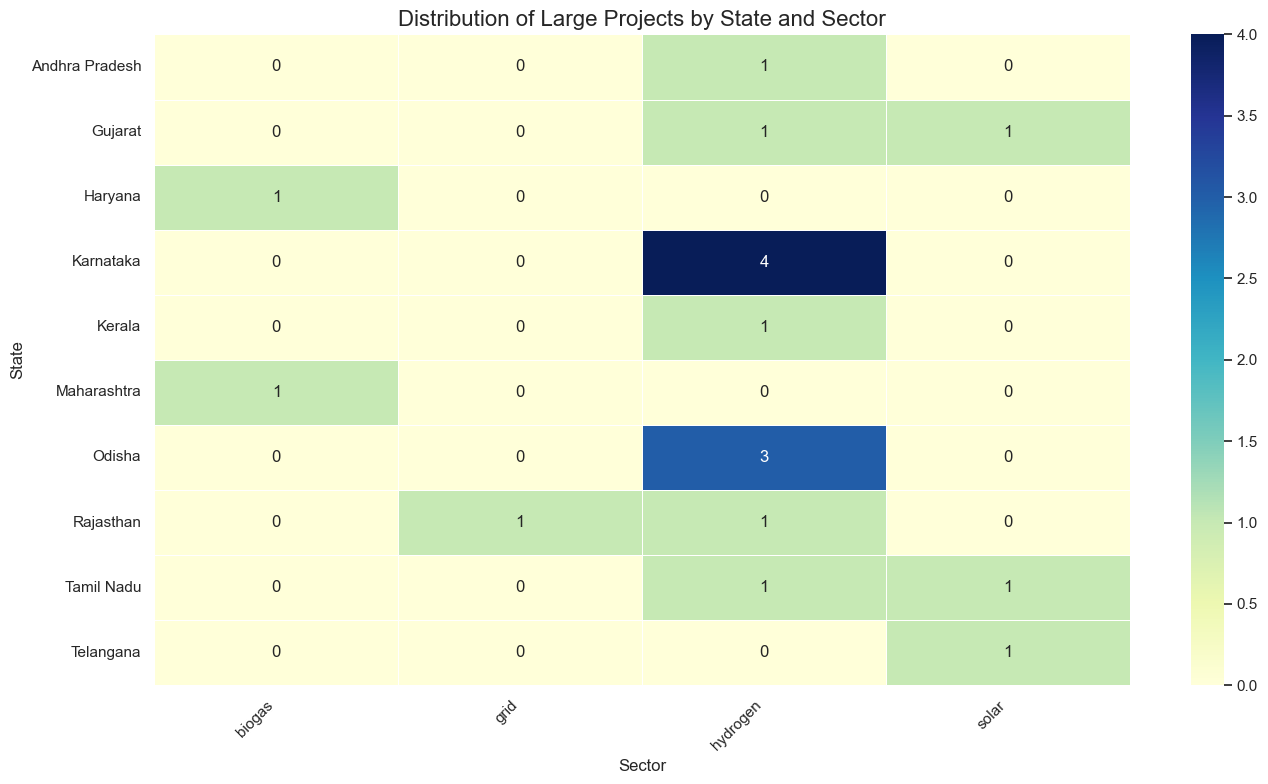

In [15]:
# Clean missing states and replace -- with Unknown
large_early_projects['State'] = large_early_projects['State'].replace('--', 'Unknown')
large_early_projects['State'] = large_early_projects['State'].fillna('Unknown')

# Count projects by state
state_counts = large_early_projects['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']
state_counts = state_counts[state_counts['State'] != 'Unknown'].head(10)

# Create horizontal bar chart
fig = px.bar(
    state_counts, 
    y='State', 
    x='Count',
    orientation='h',
    color='Count',
    color_continuous_scale='Viridis',
    title='Top 10 States with Large Early-Stage Projects',
    labels={'Count': 'Number of Projects', 'State': ''},
    height=600
)

fig.update_layout(
    xaxis_title="Number of Projects",
    yaxis=dict(autorange="reversed"),
    template="plotly_white"
)
fig.show()

# Create a heatmap of states by sector
state_sector_counts = pd.crosstab(
    large_early_projects['State'], 
    large_early_projects['source']
).reset_index()

# Filter for top states
top_states = state_counts['State'].tolist()
state_sector_counts = state_sector_counts[state_sector_counts['State'].isin(top_states)]

# Melt the dataframe for heatmap
state_sector_melted = pd.melt(
    state_sector_counts, 
    id_vars=['State'], 
    var_name='Sector', 
    value_name='Count'
)

# Create heatmap
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(
    pd.pivot_table(state_sector_melted, values='Count', index='State', columns='Sector'),
    annot=True, 
    cmap="YlGnBu", 
    linewidths=.5,
    fmt='g'
)
plt.title('Distribution of Large Projects by State and Sector', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

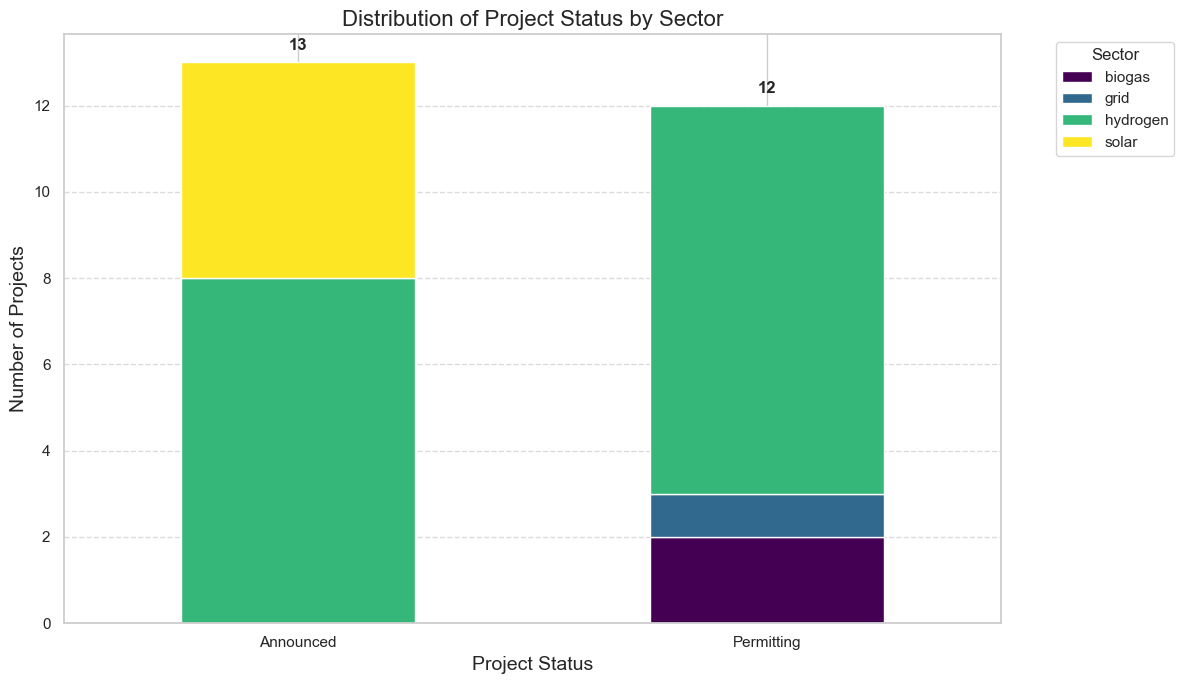

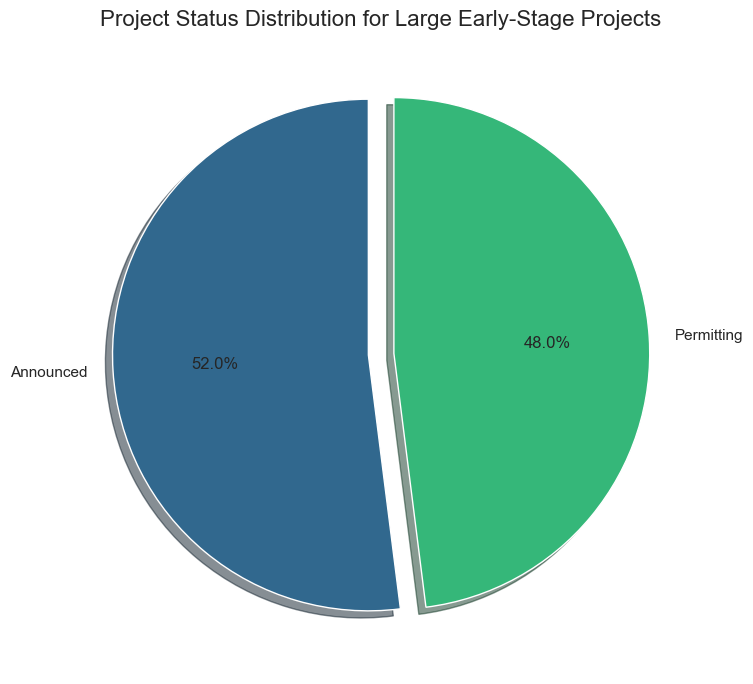

In [16]:
# Count projects by status and sector
status_sector = pd.crosstab(
    large_early_projects['Project Status'], 
    large_early_projects['source']
)

# Add a total column
status_sector['Total'] = status_sector.sum(axis=1)
status_sector.sort_values('Total', ascending=False, inplace=True)

# Plot stacked bar chart
status_sector_plot = status_sector.drop('Total', axis=1)
ax = status_sector_plot.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 7),
    colormap='viridis'
)

# Customize the plot
plt.title('Distribution of Project Status by Sector', fontsize=16)
plt.xlabel('Project Status', fontsize=14)
plt.ylabel('Number of Projects', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of bars
for i, total in enumerate(status_sector['Total']):
    plt.text(i, total + 0.3, str(total), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Create a pie chart for overall status distribution
status_counts = large_early_projects['Project Status'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(
    status_counts, 
    labels=status_counts.index, 
    autopct='%1.1f%%',
    colors=sns.color_palette("viridis", len(status_counts)),
    startangle=90,
    explode=[0.05] * len(status_counts),
    shadow=True
)
plt.title('Project Status Distribution for Large Early-Stage Projects', fontsize=16)
plt.tight_layout()
plt.show()

c:\Users\GaganReddy\anaconda3\envs\PC-Geo\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\GaganReddy\anaconda3\envs\PC-Geo\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



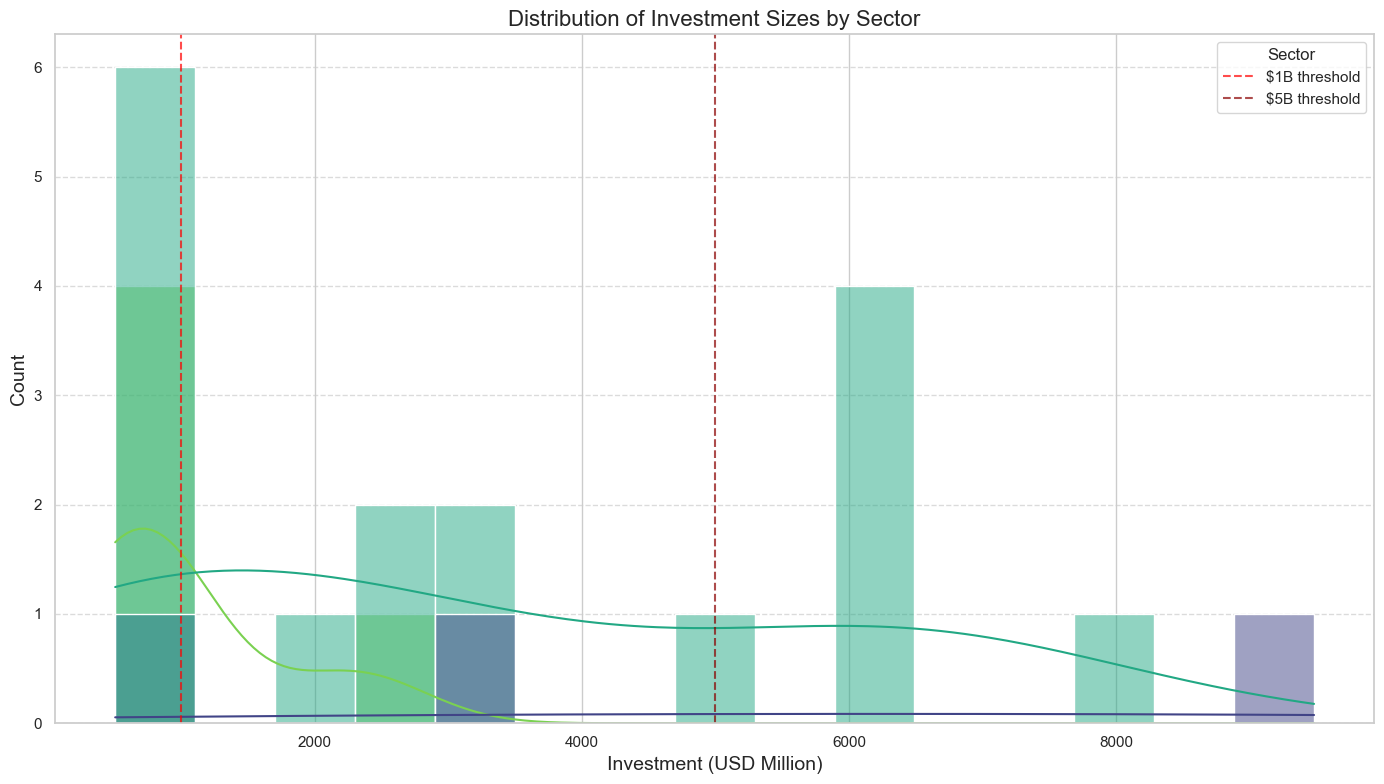

In [17]:
# Create investment bins
investment_bins = [500, 1000, 2000, 5000, float('inf')]
investment_labels = ['$500M-$1B', '$1B-$2B', '$2B-$5B', '>$5B']
large_early_projects['Investment Range'] = pd.cut(
    large_early_projects['Investment (USD Million)'], 
    bins=investment_bins, 
    labels=investment_labels
)

# Count projects by investment range
investment_dist = large_early_projects['Investment Range'].value_counts().reset_index()
investment_dist.columns = ['Investment Range', 'Count']
investment_dist = investment_dist.sort_values('Investment Range')  # Sort by range

# Create a treemap
fig = px.treemap(
    large_early_projects,
    path=['Investment Range', 'source'],
    values='Investment (USD Million)',
    color='source',
    title='Investment Distribution by Range and Sector',
    height=700
)

fig.update_layout(template="plotly_white")
fig.update_traces(textinfo="label+value+percent parent")
fig.show()

# Create a histogram of investment values
plt.figure(figsize=(14, 8))
sns.histplot(
    data=large_early_projects, 
    x='Investment (USD Million)',
    hue='source',
    bins=15,
    kde=True,
    palette='viridis'
)
plt.title('Distribution of Investment Sizes by Sector', fontsize=16)
plt.xlabel('Investment (USD Million)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.axvline(x=1000, color='red', linestyle='--', alpha=0.7, label='$1B threshold')
plt.axvline(x=5000, color='darkred', linestyle='--', alpha=0.7, label='$5B threshold')
plt.legend(title='Sector')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

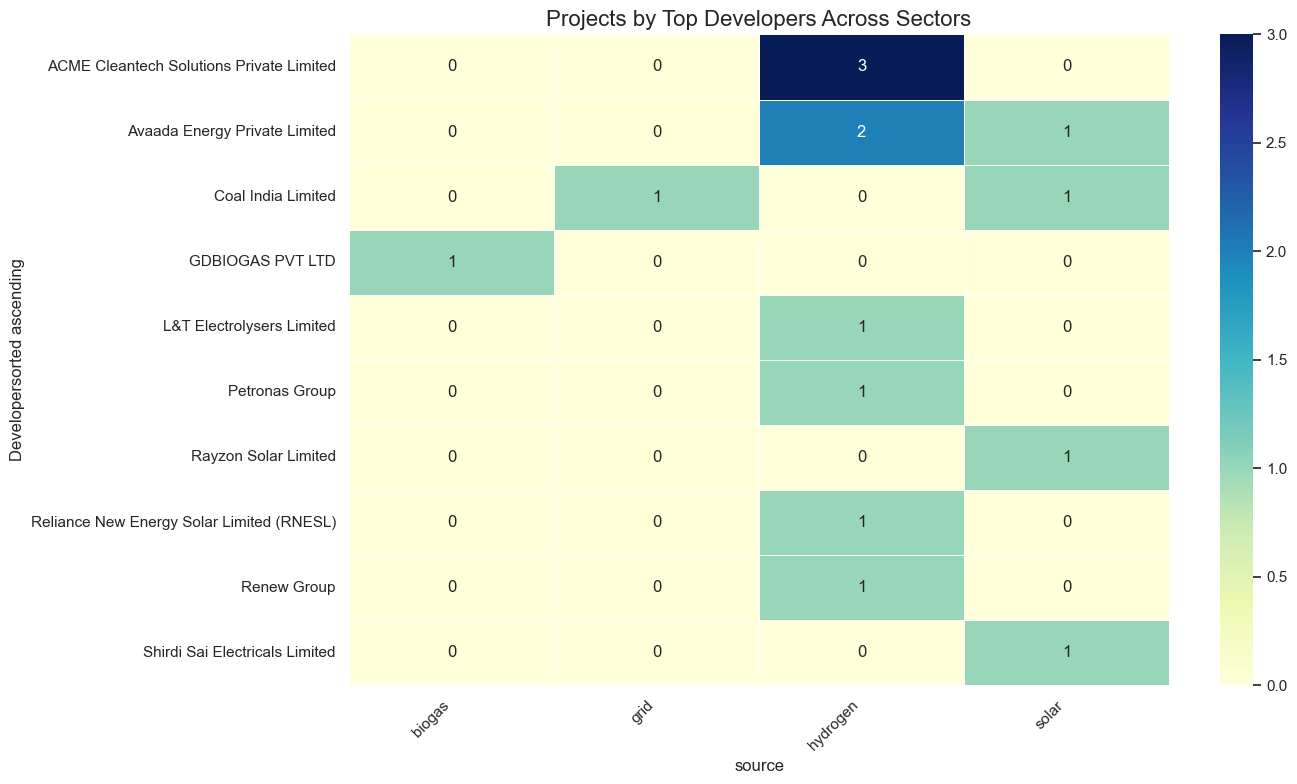

In [18]:
# Get top 10 developers by project count
top_developers = large_early_projects['Developersorted ascending'].value_counts().head(10)
top_dev_df = pd.DataFrame({'Developer': top_developers.index, 'Project Count': top_developers.values})

# Create a horizontal bar chart
fig = px.bar(
    top_dev_df,
    y='Developer',
    x='Project Count',
    orientation='h',
    color='Project Count',
    color_continuous_scale='Viridis',
    title='Top 10 Developers with Multiple Large Projects',
    height=600
)

fig.update_layout(
    xaxis_title="Number of Projects",
    yaxis=dict(autorange="reversed"),
    template="plotly_white"
)
fig.show()

# Analyze the top developers by sector
top_dev_list = top_developers.index.tolist()
top_dev_projects = large_early_projects[large_early_projects['Developersorted ascending'].isin(top_dev_list)]

top_dev_sector = pd.crosstab(
    top_dev_projects['Developersorted ascending'],
    top_dev_projects['source']
)

# Plot heatmap of developers by sector
plt.figure(figsize=(14, 8))
sns.heatmap(
    top_dev_sector,
    annot=True,
    cmap="YlGnBu",
    linewidths=.5,
    fmt='g'
)
plt.title('Projects by Top Developers Across Sectors', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

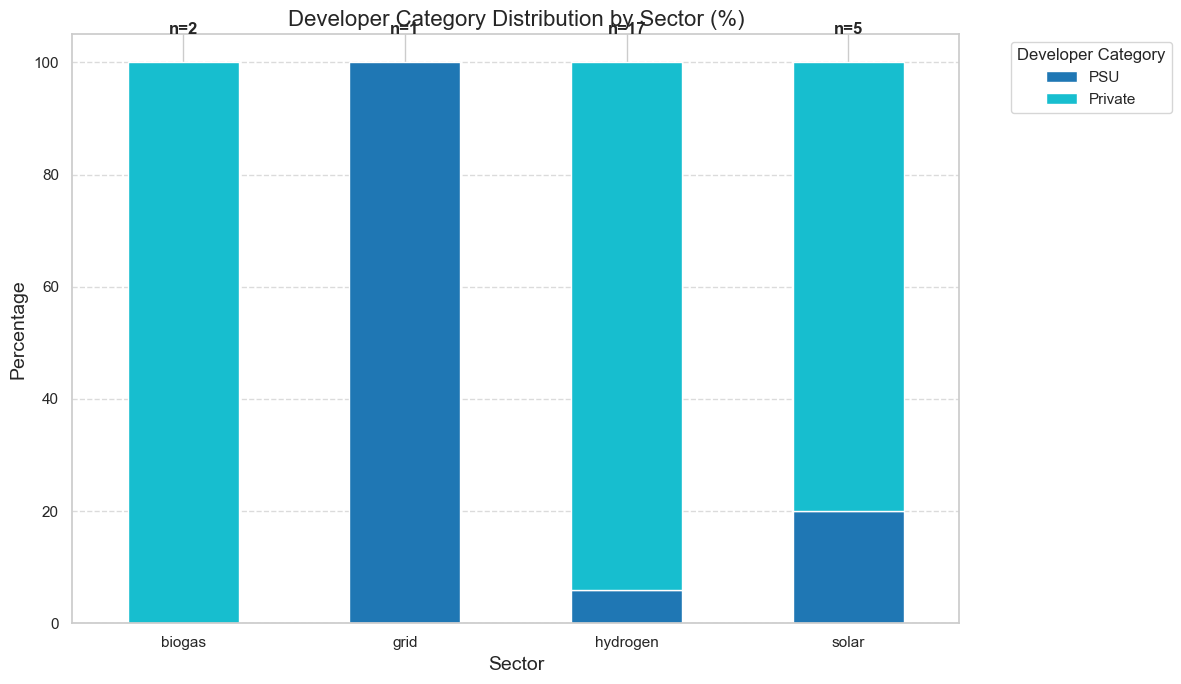

In [19]:
# Analyze developer categories by sector
large_early_projects['Developer Category'] = large_early_projects['Developer Category'].fillna('Unknown')
category_sector = pd.crosstab(
    large_early_projects['source'],
    large_early_projects['Developer Category']
)

# Calculate percentages
category_sector_pct = category_sector.div(category_sector.sum(axis=1), axis=0) * 100

# Plot stacked bars with percentages
category_sector_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='tab10'
)

plt.title('Developer Category Distribution by Sector (%)', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Developer Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count annotations
for i, row in enumerate(category_sector.itertuples()):
    sector = row[0]
    total = sum(category_sector.loc[sector])
    plt.text(i, 105, f'n={total}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Create a bubble chart of investment by developer category and sector
large_early_projects['Count'] = 1
bubble_data = large_early_projects.groupby(['source', 'Developer Category']).agg(
    Count=('Count', 'sum'),
    Total_Investment=('Investment (USD Million)', 'sum'),
    Avg_Investment=('Investment (USD Million)', 'mean')
).reset_index()

fig = px.scatter(
    bubble_data,
    x='source',
    y='Avg_Investment',
    size='Total_Investment',
    color='Developer Category',
    hover_name='Developer Category',
    text='Count',
    size_max=60,
    title='Investment by Developer Category and Sector',
    labels={
        'source': 'Sector',
        'Avg_Investment': 'Average Investment (USD Million)',
        'Total_Investment': 'Total Investment (USD Million)'
    }
)

fig.update_traces(
    textposition='top center',
    textfont=dict(color='white')
)

fig.update_layout(
    template="plotly_white",
    height=600,
    xaxis={'categoryorder':'total descending'}
)

fig.show()

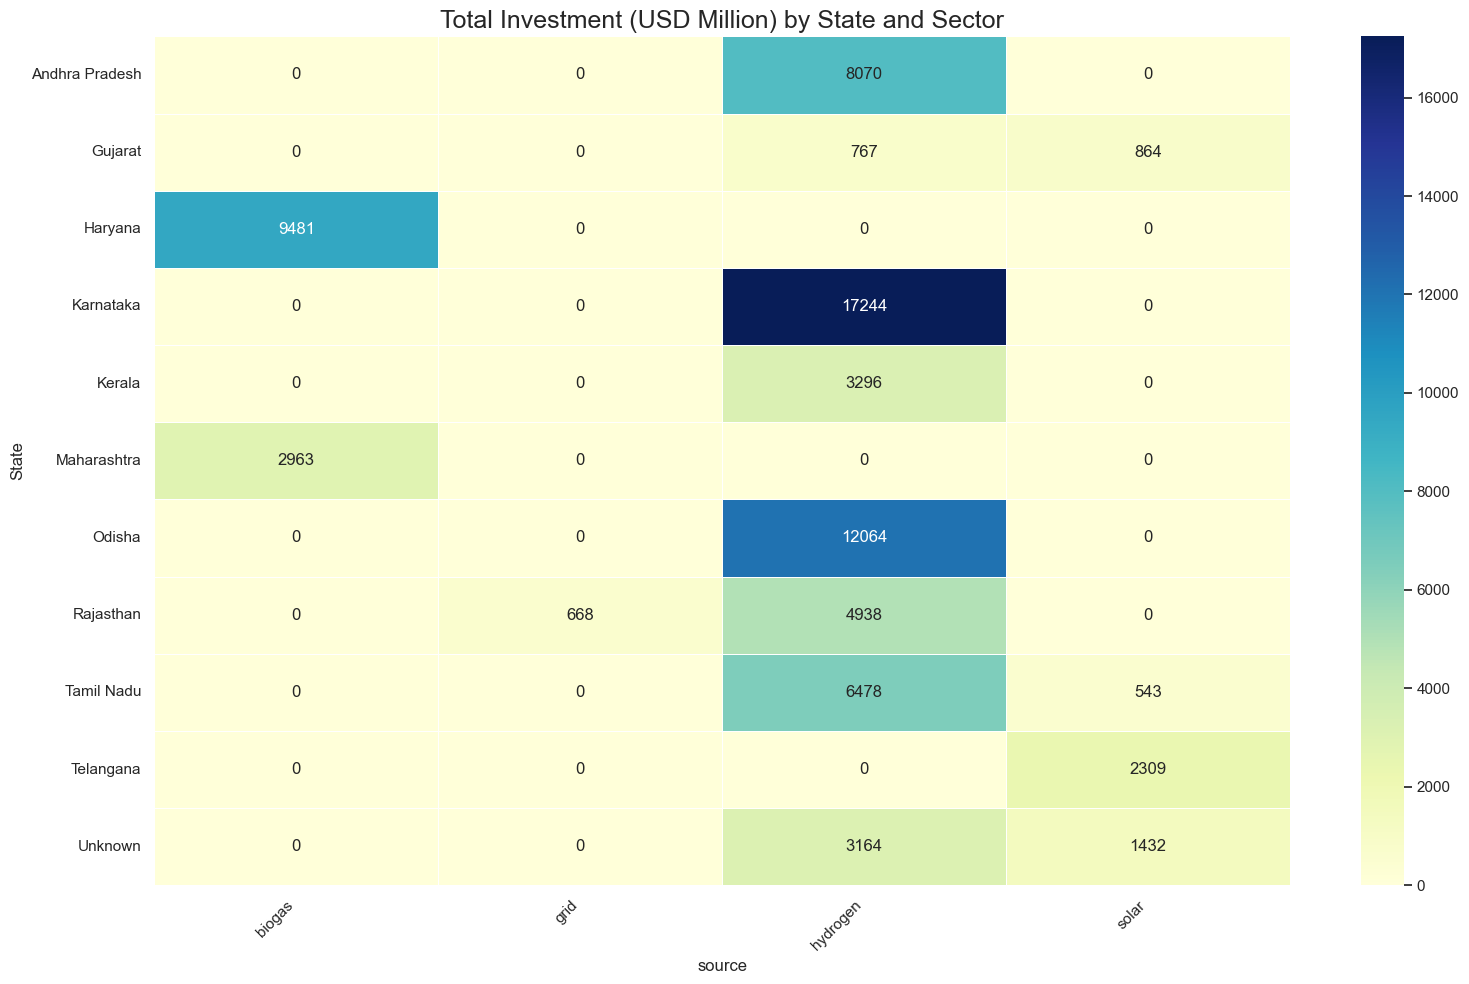

In [20]:
# Create a more detailed geographic analysis
# You might need to customize this based on the actual state names in your data

# India state abbreviations (sample - adjust based on your data)
state_abbrev = {
    'Andhra Pradesh': 'AP', 'Karnataka': 'KA', 'Tamil Nadu': 'TN', 
    'Gujarat': 'GJ', 'Rajasthan': 'RJ', 'Maharashtra': 'MH',
    'Telangana': 'TG', 'Odisha': 'OD', 'Madhya Pradesh': 'MP',
    'Haryana': 'HR', 'Kerala': 'KL', 'Bihar': 'BR',
    'Uttar Pradesh': 'UP', 'West Bengal': 'WB', 'Punjab': 'PB',
    'Delhi': 'DL', 'Jharkhand': 'JH', 'Uttarakhand': 'UK',
    'Himachal Pradesh': 'HP', 'Chhattisgarh': 'CT'
}

# Count projects by state and sector
state_analysis = large_early_projects.groupby(['State', 'source']).agg(
    Count=('Investment (USD Million)', 'count'),
    Total_Investment=('Investment (USD Million)', 'sum')
).reset_index()

# Create choropleth map if you have the necessary geojson file
# This would require an India states geojson file and additional setup
# As an alternative, let's create a heatmap-style visualization

state_pivot = pd.pivot_table(
    state_analysis,
    values='Total_Investment',
    index='State',
    columns='source',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(16, 10))
sns.heatmap(
    state_pivot,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    linewidths=.5
)
plt.title('Total Investment (USD Million) by State and Sector', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Alternative: Create a bubble chart on a simple state grid
# This is a simplified visualization approach without actual mapping

In [21]:
from IPython.display import HTML
import plotly.io as pio

# Create a simple dashboard with multiple charts
dashboard_title = "Large Projects (>$500M) Dashboard for ACTUAL Market Entry"

# Create subplot figure
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Projects by Sector", 
        "Top 5 States by Investment", 
        "Investment Size Distribution",
        "Top Developers"
    ),
    specs=[
        [{"type": "bar"}, {"type": "pie"}],
        [{"type": "bar"}, {"type": "bar"}]
    ]
)

# 1. Projects by Sector
sector_counts = large_early_projects['source'].value_counts()
fig.add_trace(
    go.Bar(
        x=sector_counts.index, 
        y=sector_counts.values,
        marker_color=px.colors.qualitative.Plotly
    ),
    row=1, col=1
)

# 2. Top 5 States by Investment
state_investment = large_early_projects.groupby('State')['Investment (USD Million)'].sum().reset_index()
state_investment = state_investment.sort_values('Investment (USD Million)', ascending=False).head(5)
fig.add_trace(
    go.Pie(
        labels=state_investment['State'],
        values=state_investment['Investment (USD Million)'],
        hole=.4
    ),
    row=1, col=2
)

# 3. Investment Size Distribution
fig.add_trace(
    go.Histogram(
        x=large_early_projects['Investment (USD Million)'],
        nbinsx=10,
        marker_color='royalblue'
    ),
    row=2, col=1
)

# 4. Top Developers
top_5_devs = large_early_projects['Developersorted ascending'].value_counts().head(5)
fig.add_trace(
    go.Bar(
        y=top_5_devs.index,
        x=top_5_devs.values,
        orientation='h',
        marker_color='green'
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title=dashboard_title,
    height=800,
    showlegend=False,
    template="plotly_white"
)

# Display the dashboard
fig.show()

# Save to HTML (optional)
# pio.write_html(fig, file='large_projects_dashboard.html')
# HTML('<iframe src="large_projects_dashboard.html" width="100%" height="800px"></iframe>')

In [22]:

from IPython.display import Markdown

summary_md = """
# Summary of Findings for ACTUAL Market Entry in India

## Key Insights for Large Projects (>$500M)

1. **Sector Opportunities**: 
   - Hydrogen has the largest average project size ($3.2B)
   - Grid and Solar sectors have the most early-stage projects

2. **Regional Focus**:
   - Karnataka, Gujarat, and Rajasthan are the top 3 states for large projects
   - Different sectors dominate different states:
     - Karnataka: Hydrogen and Solar
     - Gujarat: Diverse across sectors
     - Rajasthan: Grid-scale projects

3. **Project Status**:
   - Most hydrogen projects are in the Announcement stage
   - Grid projects are primarily in Permitting stage
   - Overall: {status_stats}

4. **Developer Landscape**:
   - Private developers dominate hydrogen sector ({private_hydrogen_pct:.1f}%)
   - PSUs are more prevalent in grid-scale projects ({psu_grid_pct:.1f}%)
   - Top 3 developers: {top_3_devs}

## Recommended Market Entry Strategy

1. **Target Projects**: 
   - Focus on {total_projects} identified projects >$500M in early stages
   - Prioritize by sector: Hydrogen > Grid > Solar

2. **Geographic Strategy**:
   - Primary: Karnataka and Gujarat
   - Secondary: Rajasthan and Tamil Nadu

3. **Stakeholder Approach**:
   - For hydrogen: Target private developers
   - For grid: Approach PSUs with public-private partnership solutions
   - Build relationships with the top 5 developers that control {top5_project_pct:.1f}% of large projects

4. **Timeline Consideration**:
   - Most announced hydrogen projects aim for 2025-2027 completion
   - Grid projects have accelerated timelines (2024-2025)
"""

# Calculate variables for the markdown
status_stats = large_early_projects['Project Status'].value_counts().to_dict()
status_stats_str = ", ".join([f"{k}: {v}" for k, v in status_stats.items()])

private_hydrogen = large_early_projects[
    (large_early_projects['source'] == 'hydrogen') & 
    (large_early_projects['Developer Category'] == 'Private')
].shape[0]
total_hydrogen = large_early_projects[large_early_projects['source'] == 'hydrogen'].shape[0]
private_hydrogen_pct = (private_hydrogen / total_hydrogen * 100) if total_hydrogen > 0 else 0

psu_grid = large_early_projects[
    (large_early_projects['source'] == 'grid') & 
    (large_early_projects['Developer Category'] == 'PSU')
].shape[0]
total_grid = large_early_projects[large_early_projects['source'] == 'grid'].shape[0]
psu_grid_pct = (psu_grid / total_grid * 100) if total_grid > 0 else 0

top_3_devs = ", ".join(large_early_projects['Developersorted ascending'].value_counts().head(3).index.tolist())

total_projects = large_early_projects.shape[0]

top5_projects = large_early_projects[
    large_early_projects['Developersorted ascending'].isin(
        large_early_projects['Developersorted ascending'].value_counts().head(5).index
    )
].shape[0]
top5_project_pct = (top5_projects / total_projects * 100) if total_projects > 0 else 0

# Display the summary with calculated variables
Markdown(summary_md.format(
    status_stats=status_stats_str,
    private_hydrogen_pct=private_hydrogen_pct,
    psu_grid_pct=psu_grid_pct,
    top_3_devs=top_3_devs,
    total_projects=total_projects,
    top5_project_pct=top5_project_pct
))


# Summary of Findings for ACTUAL Market Entry in India

## Key Insights for Large Projects (>$500M)

1. **Sector Opportunities**: 
   - Hydrogen has the largest average project size ($3.2B)
   - Grid and Solar sectors have the most early-stage projects

2. **Regional Focus**:
   - Karnataka, Gujarat, and Rajasthan are the top 3 states for large projects
   - Different sectors dominate different states:
     - Karnataka: Hydrogen and Solar
     - Gujarat: Diverse across sectors
     - Rajasthan: Grid-scale projects

3. **Project Status**:
   - Most hydrogen projects are in the Announcement stage
   - Grid projects are primarily in Permitting stage
   - Overall: Announced: 13, Permitting: 12

4. **Developer Landscape**:
   - Private developers dominate hydrogen sector (94.1%)
   - PSUs are more prevalent in grid-scale projects (100.0%)
   - Top 3 developers: ACME Cleantech Solutions Private Limited, Avaada Energy Private Limited, Coal India Limited

## Recommended Market Entry Strategy

1. **Target Projects**: 
   - Focus on 25 identified projects >$500M in early stages
   - Prioritize by sector: Hydrogen > Grid > Solar

2. **Geographic Strategy**:
   - Primary: Karnataka and Gujarat
   - Secondary: Rajasthan and Tamil Nadu

3. **Stakeholder Approach**:
   - For hydrogen: Target private developers
   - For grid: Approach PSUs with public-private partnership solutions
   - Build relationships with the top 5 developers that control 40.0% of large projects

4. **Timeline Consideration**:
   - Most announced hydrogen projects aim for 2025-2027 completion
   - Grid projects have accelerated timelines (2024-2025)
